prueba muestra de las imagenes 

(374, 9, 60, 180)


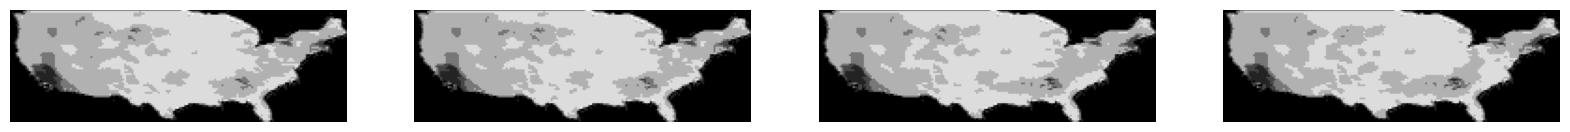

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the npy file
image_data = np.load('DroughtDatasetMask/dataset/ResultadosEspacioLatenteV1/v1w10/60_180Part0_0/x_test_mask.npy')
image_data = image_data.squeeze()
print(image_data.shape)

# Display 4 images 
plt.figure(figsize=(20, 20))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(image_data[i][0], cmap='gray')
    plt.axis('off')

Prueba de los cubos de imagenes

(374, 9, 60, 180)


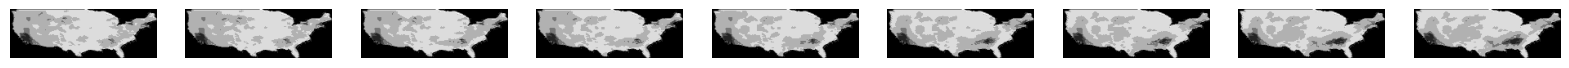

In [25]:

# Load the npy file
image_data = np.load('DroughtDatasetMask/dataset/ResultadosEspacioLatenteV1/v1w10/60_180Part0_0/x_test_mask.npy')
image_data = image_data.squeeze()
print(image_data.shape)

# Display 4 images 
plt.figure(figsize=(20, 20))
for i in range(9):
    plt.subplot(1, 9, i + 1)
    plt.imshow(image_data[0][i], cmap='gray')
    plt.axis('off')

Pueba separacion del dataset

In [8]:
from PIL import Image
def gray_quantized(img, palette):
  rows, cols = len(img), len(img[0])
  total_vals = 1
  for i in palette.shape:
    total_vals *= i
  palettedata = palette.reshape(total_vals).tolist()
  palImage = Image.new('L', (rows, cols))
  palImage.putpalette(palettedata*32)
  oldImage = Image.fromarray(img, 'L')
  newImage = quantizetopalette(oldImage,palImage, mode="L")
  res_image = np.asarray(newImage)
  return res_image

#Función para dada una paleta solo tomar los colores de esa paleta en la imagen
def quantizetopalette(silf, palette, dither=False, mode="P"):
  """Convert an RGB or L mode image to use a given P image's palette."""
  silf.load()
  palette.load()
  im = silf.im.convert(mode, 0, palette.im)
  # the 0 above means turn OFF dithering making solid colors
  return silf._new(im)

def recolor_greys_image(data, palette):
    rows, cols = len(data), len(data[0])
    aux = np.zeros((rows, cols), dtype=np.uint64)
    for i in range(rows):
        for j in range(cols):
            aux[i,j] = min(palette, key= lambda x:abs(x-data[i,j]))
    return aux

#Toma todos los colores existentes en la imagen
def get_colors(image):
  aux = []
  band = True
  for i in image:
    for j in i:

      for k in aux:
        if j.tolist() == k:
          band = False
          break
      if band:
        aux.append(j.tolist())
      band = True
  return np.array(aux)

def agroup_window(data, window):
    new_data = [data[i:window+i] for i in range(len(data)-window+1)]
    return np.array(new_data)


In [20]:
categories = [0, 35, 70, 119, 177, 220, 255] 
window = 5

dataSet= np.load("DroughtDatasetMask/DataSetBordesAutomatico/Numpys/EspacioLatente60180/Espaciolatente.npy")
print("dataset ",dataSet.shape)
print("dataType", dataSet.dtype)
print("dataMin ", dataSet.min())
print("dataMax ", dataSet.max())

channels = 1
rows, cols = dataSet.shape[1], dataSet.shape[2]

dataset  (1254, 60, 180)
dataType uint8
dataMin  0
dataMax  255


In [18]:
#add a index to the dataSet
dataSet = np.expand_dims(dataSet, axis=3)
print("dataset ",dataSet.shape)

dataset  (1254, 60, 180, 1)


In [21]:
dataSet = np.array([gray_quantized(i, np.array(categories)) for i in dataSet])
colors_greys = get_colors(dataSet[1168])
print(f"Colores {colors_greys}")
print(dataSet.shape)


Colores [  0   5   1   2  19  81 117 120 121 109 101  97  85  83  86 102 107 118
 119 103  63  34  32  31  42  75  94 104 110 126 162 241 255 224  60   4
   8   3  10 161 189 217 225 227 226 219 201 175 160 157 163 188 197 209
 221 220 194 149  73  64  69  77  72  65  62 145 154 156 158 181 190 191
 195 202 222 210 211 187 124 127 141  93  14   7   9  12  35  71 115 125
 139 108  91 177 203 204 167 144 153 171 206 182 200  55  58  51  59  68
  78 112 135 138 140 142 143 170 172 185 205 208 240 237 239 198 123  43
 128 166  44   6 129 213 179 152 151 168 178  99 146  52 131 169 230 229
 215 214 133  56 173 207 186 159 176 199 183  87 111 134 174 233 231 165
  22  36  38  39  95 147 116 113 218 192  70  15  25  16  30 184  79  92
 155 238  67  40 150  23  24  11  29  54 193  88 136 216  21  76 105  89
  47  96 137  20  26  28 100  48  13  27  80  46 130  84 243  50  18  17
 232]
(1254, 60, 180)


In [22]:
dataSet_greys = np.array([recolor_greys_image(img, categories) for img in dataSet])
dataSet = dataSet_greys.astype('float32') / 255
#print(get_colors(dataSet[1168]))
print(dataSet.shape)

(1254, 60, 180)


In [46]:
x_2 = agroup_window(dataSet, window)
print(x_2.shape)


(1250, 5, 60, 180)


In [47]:

x_train = x_2[:int(len(x_2)*.7)] # Toma los primeos 70% de los datos
print("xtrain",x_train.shape)
x_test = x_2[int(len(x_2)*.7):] # Toma el 30% de los datos restantes
print("xtest",x_test.shape)


xtrain (875, 5, 60, 180)
xtest (375, 5, 60, 180)


In [48]:
x_validation = x_train[int(len(x_train)*.8):] # Toma el 20% de los datos restantes
print("xvalidation",x_validation.shape)
x_train = x_train[:int(len(x_train)*.8)] # Toma los primeos 80% de los datos
print("xtrain",x_train.shape)

xvalidation (175, 5, 60, 180)
xtrain (700, 5, 60, 180)


In [51]:
x_train = x_train.reshape(len(x_train), window, rows, cols, channels)
x_validation = x_validation.reshape(len(x_validation), window, rows, cols, channels)
x_test = x_test.reshape(len(x_test), window, rows, cols, channels)

print("xtrain",x_train.shape)
print("xvalidation",x_validation.shape)
print("xtest",x_test.shape)

xtrain (700, 5, 60, 180, 1)
xvalidation (175, 5, 60, 180, 1)
xtest (375, 5, 60, 180, 1)


In [2]:
import os
lista = []

def guardarNombresDeImagenes(imgName):
    lista.append(imgName)
        

    
    return lista        
def guardarEnExcel(lista):
    import pandas as pd
    df = pd.DataFrame(lista, columns = ['Index', 'Nombre'])
    df.to_excel('DroughtDatasetMask/DataSetBordesAutomatico/Prueba1/4X4/crop_10/imagenes4X4_10.xlsx', index=False)
    return df

# Ruta al directorio con imágenes originales
folder_path = 'DroughtDatasetMask/ActualizacionDataSetMani/imagenesMak1'
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]
image_files = sorted(image_files)

#print(image_files)
for i, file in enumerate(image_files):
    lista = guardarNombresDeImagenes(file)
    
    #imprimir el largo de la lista
print(len(lista))
print(lista[1253])
#guardarEnExcel(lista)



1254
2024-01-09.png


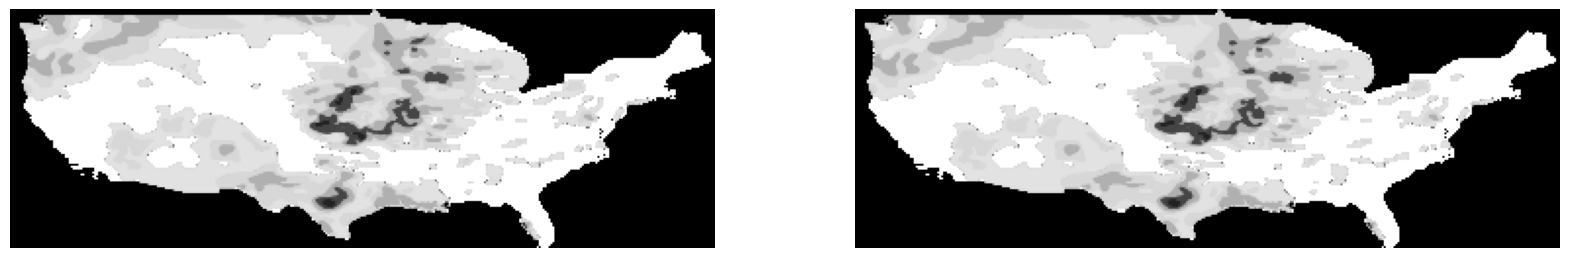

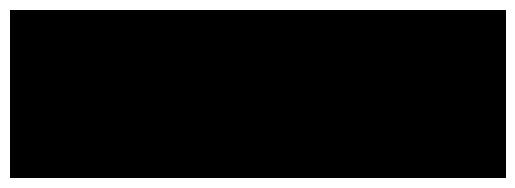

In [7]:
ruta1 = "DroughtDatasetMask/ActualizacionDataSetMani/imagenesMak1/"+lista[1230]
ruta2 = "DroughtDatasetMask/ActualizacionDataSetMani/imagenesMak1/"+lista[1230]

img1 = Image.open(ruta1)
img2 = Image.open(ruta2)

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.show()

# Convert the images to grayscale
img1_gray = img1.convert('L')
img2_gray = img2.convert('L')

# Convert the images to numpy arrays
img1_array = np.array(img1_gray)
img2_array = np.array(img2_gray)

# Calculate the pixel-by-pixel difference
diff_array = np.abs(img1_array - img2_array)

#change the color of the image
diff_array = diff_array*255
# Display the difference image
plt.imshow(diff_array, cmap='gray')
plt.axis('off')
plt.show()

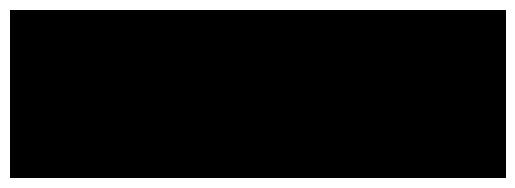

In [70]:
# Convert the images to grayscale
img1_gray = img1.convert('L')
img2_gray = img2.convert('L')

# Convert the images to numpy arrays
img1_array = np.array(img1_gray)
img2_array = np.array(img2_gray)

# Calculate the pixel-by-pixel difference
diff_array = np.abs(img1_array - img2_array)

# Display the difference image
plt.imshow(diff_array, cmap='gray')
plt.axis('off')
plt.show()
